<a href="https://colab.research.google.com/github/Far0311/Data-Analysis-with-Phyton/blob/main/Telco_Churn_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and Explore Data

In [54]:
# Import libraries
import pandas as pd

In [55]:
# load the dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [56]:
# display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Preprocessing
Handling Missing Values

In [57]:
# Convert 'TotalCharges' to numeric (handling errors if any values are non-numeric)
# The errors='coerce' argument in pd.to_numeric() is used to handle cases where the column contains non-numeric values that need to be converted into numeric format.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [58]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

Missing values before handling:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [59]:
# Fill missing values in 'TotalCharges' with the median
df = df.assign(TotalCharges = df['TotalCharges'].fillna(df['TotalCharges'].median()))

In [60]:
# Verify no missing values remain
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n",missing_values_after)

Missing values after handling:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 3. Encoding Categorical Variables

In [61]:
# Convert binary categorical variables to 0 and 1
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)

<ipython-input-61-a8855a364c25>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


In [62]:
# Apply one-hot encoding to categorical variables
df = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies'], drop_first=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  gender_Male                            7043 non-null   bool   
 11  Inte

In [64]:
# Drop 'customerID' as it's not useful for prediction
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

# Display the updated dataframe structure
print(df.head())

   SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  \
0              0        1           0       1             0                 1   
1              0        0           0      34             1                 0   
2              0        0           0       2             1                 1   
3              0        0           0      45             0                 0   
4              0        0           0       2             1                 1   

   MonthlyCharges  TotalCharges  Churn  gender_Male  ...  \
0           29.85         29.85      0        False  ...   
1           56.95       1889.50      0         True  ...   
2           53.85        108.15      1         True  ...   
3           42.30       1840.75      0         True  ...   
4           70.70        151.65      1        False  ...   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             False              True   
1                             False   

# 4. Splitting Data for Model Training

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Define features and target variable
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [67]:
# Split into training (80%) and testing (20%) sets
# stratify = y ensures that the class distribution of the target variable (y) remains the same in both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# 5. Train a Machine Learning Model


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Train a Random Forest Classifier
# changing class weights in the model helps correct class imbalance, boosting recall
# increasing max_depth and adjusting min_samples_split to make the model focus on harder-to-classify cases
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [70]:
# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for AUC-ROC

# 6. Model Evaluation & Performance Metrics

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [72]:
# Compute evaluation metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob)
}

In [73]:
# Display model performance
print("Model Performance Metrics:\n", metrics)

Model Performance Metrics:
 {'Accuracy': 0.7679205110007097, 'Precision': 0.5518763796909493, 'Recall': 0.6684491978609626, 'F1-score': 0.6045949214026601, 'AUC-ROC': 0.8394262316257202}


# 7. Feature Importance Analysis

In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# Get feature importance scores
feature_importance = model.feature_importances_
feature_names = X.columns

In [76]:
# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]
top_features = feature_names[sorted_idx][:10]
top_importance = feature_importance[sorted_idx][:10]

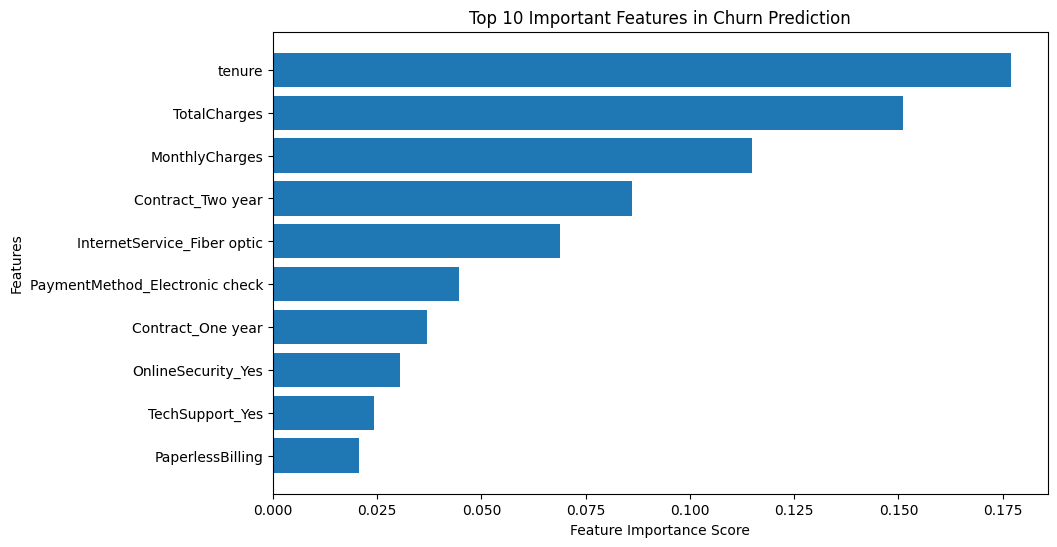

In [77]:
# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(top_features[::-1], top_importance[::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Churn Prediction")
plt.show()

# Implementing XGBoost for Churn Prediction
Random Forest Classifier showing suboptimal performance even after fine tuning the parameters. XGBoost is implemented for better prediction performance

In [78]:
# Run the following command to install a version of scikit-learn that is compatible with xgboost:
# !pip install scikit-learn==1.2.2 xgboost

In [79]:
from xgboost import XGBClassifier

In [80]:
# Convert boolean columns to integer (0/1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [81]:
# Train XGboost Model
# Compute class weight (ratio of non-churn to churn cases)
# use scale_pos_weight to handle class imbalance:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

In [82]:
# Define the XGBoost model
model = XGBClassifier(
    n_estimators=300,            # More trees for better learning
    learning_rate=0.03,          # Lower learning rate to improve precision
    max_depth=3,                 # Simplifies trees, reducing false positives
    min_child_weight=10,          # Forces better precision at cost of recall
    gamma=0.5,                   # Reduces overfitting, improving precision
    colsample_bytree=0.8,        # Randomly selects 80% of features per tree
    scale_pos_weight=scale_pos_weight,  # Handles class imbalance
    objective="binary:logistic",
    eval_metric="logloss",
    early_stopping_rounds=50,
    random_state=42
)

In [83]:
# Train the model
# Use Early Stopping to Prevent Overfitting

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Validation set for early stopping

    verbose=True
)


[0]	validation_0-logloss:0.68461
[1]	validation_0-logloss:0.67640
[2]	validation_0-logloss:0.66881
[3]	validation_0-logloss:0.66211
[4]	validation_0-logloss:0.65547
[5]	validation_0-logloss:0.64904
[6]	validation_0-logloss:0.64258
[7]	validation_0-logloss:0.63698
[8]	validation_0-logloss:0.63170
[9]	validation_0-logloss:0.62656
[10]	validation_0-logloss:0.62174
[11]	validation_0-logloss:0.61707
[12]	validation_0-logloss:0.61271
[13]	validation_0-logloss:0.60768
[14]	validation_0-logloss:0.60330
[15]	validation_0-logloss:0.59909
[16]	validation_0-logloss:0.59490
[17]	validation_0-logloss:0.59096
[18]	validation_0-logloss:0.58703
[19]	validation_0-logloss:0.58381
[20]	validation_0-logloss:0.58083
[21]	validation_0-logloss:0.57799
[22]	validation_0-logloss:0.57530
[23]	validation_0-logloss:0.57271
[24]	validation_0-logloss:0.57001
[25]	validation_0-logloss:0.56769
[26]	validation_0-logloss:0.56497
[27]	validation_0-logloss:0.56278
[28]	validation_0-logloss:0.56011
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [84]:
from sklearn.metrics import precision_recall_curve

y_prob = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Find threshold that maximizes precision while keeping recall reasonable
best_threshold = thresholds[np.argmax(precisions >= 0.6)]  # Adjust for desired precision
y_pred_adjusted = (y_prob >= best_threshold).astype(int)

In [85]:
desired_precision = 0.58  # Adjust to balance precision & recall
best_threshold = thresholds[np.argmax(precisions >= desired_precision)]
y_pred_final = (y_prob >= best_threshold).astype(int)

In [86]:
# Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

In [87]:
# Compute evaluation metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob)
}

# Compute new metrics using the adjusted predictions
adjusted_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_adjusted),
    "Precision": precision_score(y_test, y_pred_adjusted),
    "Recall": recall_score(y_test, y_pred_adjusted),
    "F1-score": f1_score(y_test, y_pred_adjusted),
    "AUC-ROC": roc_auc_score(y_test, y_prob)  # Use y_prob to get AUC correctly
}

# Compute new metrics using the adjusted predictions
final_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_final),
    "Precision": precision_score(y_test, y_pred_final),
    "Recall": recall_score(y_test, y_pred_final),
    "F1-score": f1_score(y_test, y_pred_final),
    "AUC-ROC": roc_auc_score(y_test, y_prob)  # Use y_prob to get AUC correctly
}

In [88]:
# Display model performance
print("XGBoost Model Performance:\n", metrics)

XGBoost Model Performance:
 {'Accuracy': 0.7416607523066004, 'Precision': 0.5083892617449665, 'Recall': 0.8101604278074866, 'F1-score': 0.6247422680412371, 'AUC-ROC': 0.8470769071792088}


In [89]:
# Display results
print("Optimized Model Performance with Adjusted Threshold:\n", adjusted_metrics)

Optimized Model Performance with Adjusted Threshold:
 {'Accuracy': 0.7920511000709723, 'Precision': 0.6004962779156328, 'Recall': 0.6470588235294118, 'F1-score': 0.6229086229086229, 'AUC-ROC': 0.8470769071792088}


In [90]:
# Display results
print("Final Model Performance with Adjusted Threshold:\n", final_metrics)

Final Model Performance with Adjusted Threshold:
 {'Accuracy': 0.7856635911994322, 'Precision': 0.5807174887892377, 'Recall': 0.6925133689839572, 'F1-score': 0.6317073170731706, 'AUC-ROC': 0.8470769071792088}


# Clustering for Customer Segmentation
Group customers based on their behavior and churn risk.

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [92]:
# Select relevant numerical features
features = ["tenure", "MonthlyCharges", "TotalCharges", "Contract_One year", "Contract_Two year", "PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check", "OnlineSecurity_Yes", "TechSupport_Yes"]
X_cluster = df[features].copy()

In [93]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [94]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

In [95]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
K_range = range(1, 10)  # Testing K values from 1 to 10

In [96]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

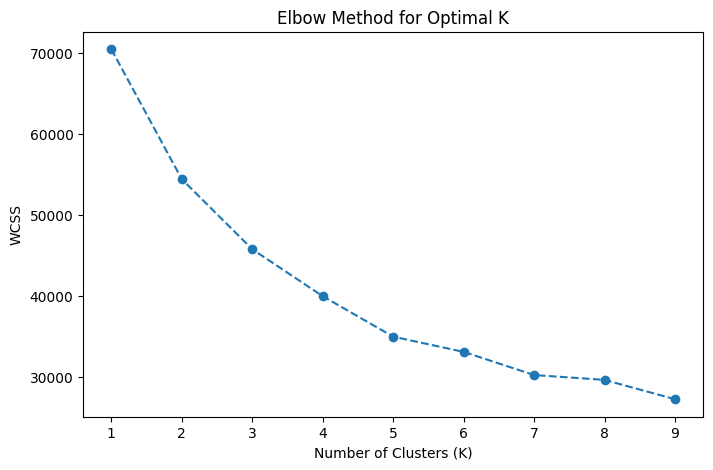

In [97]:
# Plot the Elbow Method to find the optimal K
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [98]:
# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')  # K = 5 is the optimal choice based on the Elbow Method

df_pca["Cluster"] = kmeans.fit_predict(X_pca)

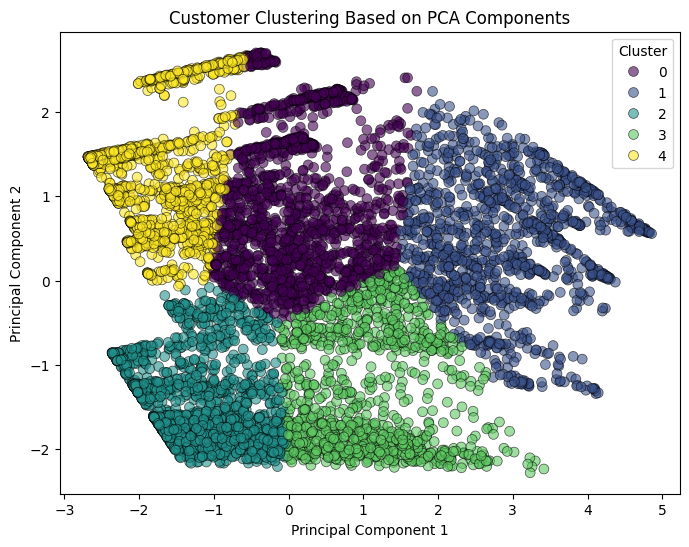

In [99]:
# Visualize clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="viridis", alpha=0.6, edgecolor='black', s=50)
plt.title("Customer Clustering Based on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [100]:
# Analyze churn rates per cluster
df["Cluster"] = df_pca["Cluster"]  # Map clusters back to original dataframe
churn_rates = df.groupby("Cluster")["Churn"].mean()
print("Churn Rates by Cluster:")
print(churn_rates)

Churn Rates by Cluster:
Cluster
0    0.141276
1    0.065844
2    0.553191
3    0.273867
4    0.215040
Name: Churn, dtype: float64


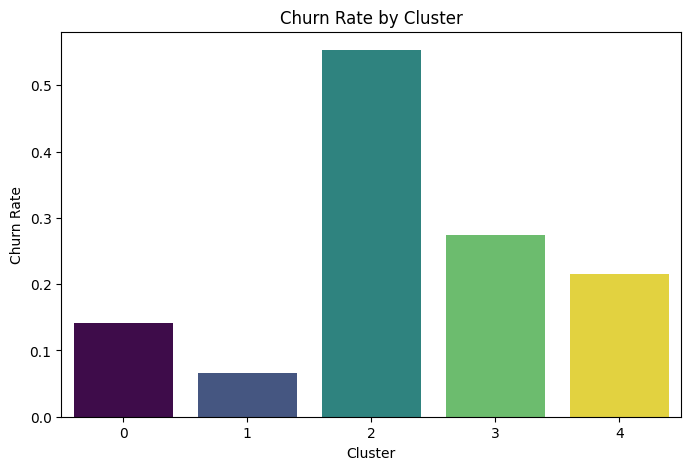

In [101]:
# Visualize churn rates
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_rates.index, y=churn_rates.values, hue=churn_rates.index, palette="viridis", legend=False)
plt.xlabel("Cluster")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Cluster")
plt.show()

In [102]:
# Generate deeper breakdown of customer characteristics per cluster
cluster_summary = df.groupby("Cluster")[features + ["Churn"]].mean()
print("Customer Characteristics by Cluster:")
print(cluster_summary)

Customer Characteristics by Cluster:
            tenure  MonthlyCharges  TotalCharges  Contract_One year  \
Cluster                                                               
0        38.996745       51.955990   1727.580908           0.255859   
1        63.571193       89.014527   5684.968560           0.240329   
2        12.438183       70.701409    868.594853           0.051179   
3        46.638380       91.207232   4254.530858           0.405979   
4        13.758575       33.395712    388.063918           0.183377   

         Contract_Two year  PaymentMethod_Credit card (automatic)  \
Cluster                                                             
0                 0.353516                               0.453125   
1                 0.704527                               0.504527   
2                 0.000000                               0.000575   
3                 0.062681                               0.047252   
4                 0.152375                         

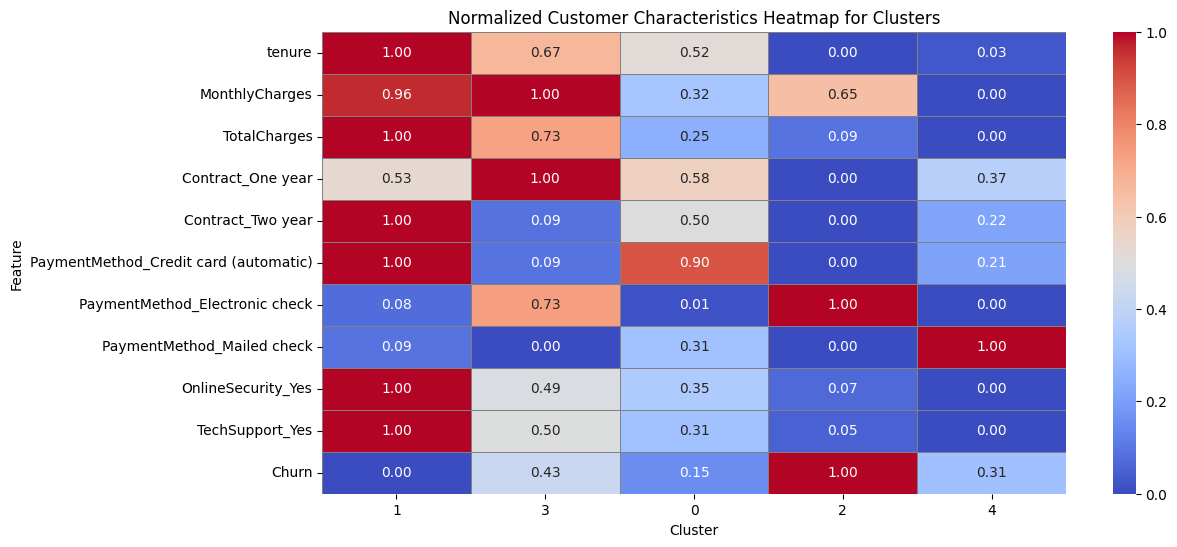

In [103]:
# Visualize key cluster characteristics
# Normalize feature values for better comparison
normalized_cluster_summary = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

# Sort features by their average value across clusters
sorted_features = normalized_cluster_summary.mean(axis=1).sort_values(ascending=False).index
sorted_normalized_cluster_summary = normalized_cluster_summary.loc[sorted_features]

# Visualize feature distribution using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sorted_normalized_cluster_summary.T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Normalized Customer Characteristics Heatmap for Clusters")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

In [104]:
# Focus on high churn clusters (top 50% churn rate)
high_churn_clusters = churn_rates[churn_rates > churn_rates.median()].index
df_high_churn = df[df["Cluster"].isin(high_churn_clusters)]

In [105]:
# Analyze features of high churn clusters
high_churn_summary = df_high_churn.groupby("Cluster")[features + ["Churn"]].mean()
print("High Churn Cluster Characteristics:")
print(high_churn_summary)

High Churn Cluster Characteristics:
            tenure  MonthlyCharges  TotalCharges  Contract_One year  \
Cluster                                                               
2        12.438183       70.701409    868.594853           0.051179   
3        46.638380       91.207232   4254.530858           0.405979   

         Contract_Two year  PaymentMethod_Credit card (automatic)  \
Cluster                                                             
2                 0.000000                               0.000575   
3                 0.062681                               0.047252   

         PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
Cluster                                                               
2                              0.903968                         0.0   
3                              0.664417                         0.0   

         OnlineSecurity_Yes  TechSupport_Yes     Churn  
Cluster                                                 
2  

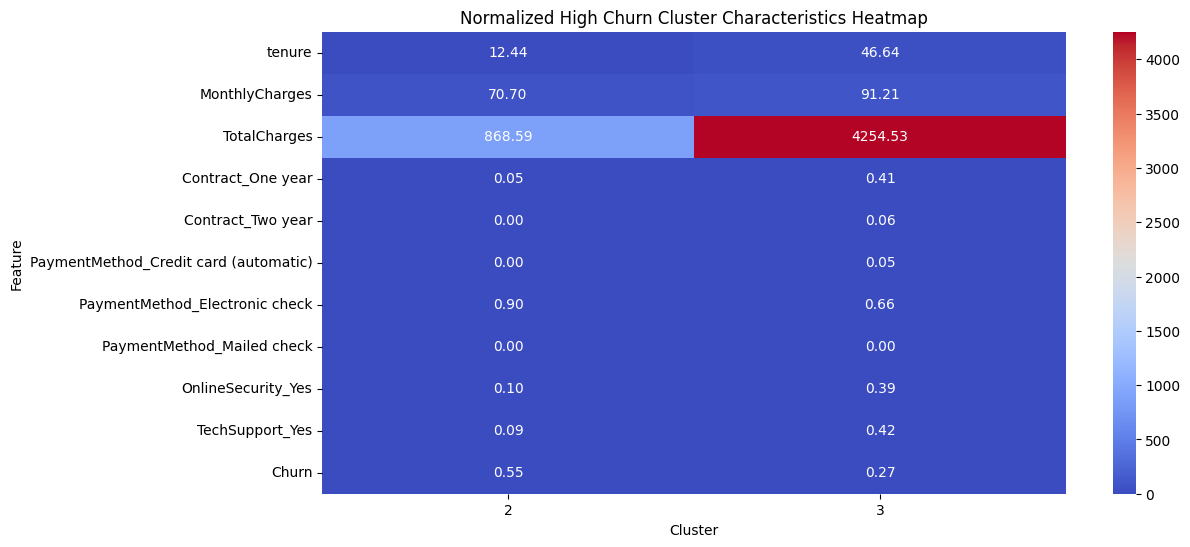

In [106]:
# Visualize high churn cluster characteristics using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(high_churn_summary.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Normalized High Churn Cluster Characteristics Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()